<a href="https://colab.research.google.com/github/Airee66/MAT421/blob/main/ModuleB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 17. Interpolation
### Ainsley Chapman
### Date: 1/22/2023


## Section 17.1 - Interpolation Problem Statement

Interpolation is a mathematical tool to estimate a value or function from pre-existing data.  Assuming we have independent data values $x_{i}$ and dependent values $y_{i}$ we would like to find an interpolation function $\hat{y}(x)$.

Interpolation is different than regression because it does not require a basis model for the data so long as there are reliable data points.  

Suppose we wanted to estimate where a new point may lie on the graph given below.  We could do that with linear interpolation.  Suppose we wanted to determine a smooth function that connected these points, we could do this with cubic spline interpolation.

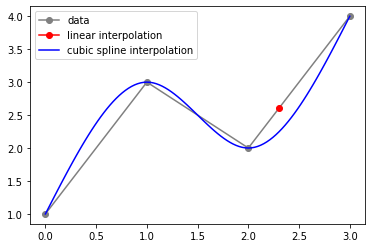

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

#linear interpolation
a = [0, 1, 2, 3]
b = [1, 3, 2, 4]
xnew = 2.3
bn = np.interp(xnew, a, b)

#cubic spline interpolation
fn = CubicSpline(a, b, bc_type='natural')
c = np.linspace(0, 3, 100)
d = fn(c)


plt.plot(a, b, '-ro', label = 'data', color = 'grey')
plt.plot(xnew, bn, '-o', label = 'linear interpolation', color = 'red')
plt.plot(c, d, 'b', label = 'cubic spline interpolation', color = 'blue')
plt.legend()
plt.show()

#print(bn)

## Section 17.2 - Linear Interpolation



In linear interpolation, the location of a new point with a given x value is computed using the equation below, such that $x_i < x < x_{i+1}$

\begin{align}
\hat{y}(x) = y_i + \frac{(y_{i+1} - y_{i})(x - x_{i})}{(x_{i+1} - x_{i})}
\end{align}

In python, we can perform linear interpolation using the interp1d function from the scipy library.  Below is an example with data sets x and y for which the python function computes the linear interpolation for when x = 3.2.

Linear interpolation for x = 3.2 --> y hat = 6.3999999999999995


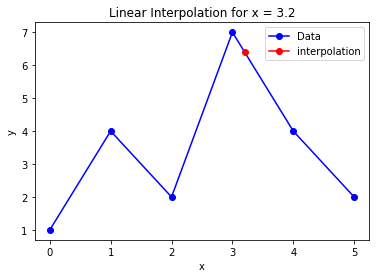

In [2]:
x = [0, 1, 2, 3, 4, 5]
y = [1, 4, 2, 7, 4, 2]
x1 = 3.2

f = interp1d(x, y)
yhat = f(x1)
print(f"Linear interpolation for x = {x1} --> y hat = {yhat}")

plt.plot(x, y, '-ob', color = 'blue', label = 'Data')
plt.plot(x1, yhat, '-ro', label = 'interpolation')
plt.title('Linear Interpolation for x = 3.2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Section 17.3 - Cubic Spline Interpolation

Cubic spline interpolation utilizes piecewise cubic functions (splines) between points to generate an interpolating function.  


\begin{eqnarray*}
S_i(x_i) &=& y_i,\quad i = 1,\ldots,n-1,\\
S_i(x_{i+1}) &=& y_{i+1},\quad i = 1,\ldots,n-1,
\end{eqnarray*}




To join each function smoothly, they are constrained by taking the first and second derivatives of the splines.  

\begin{eqnarray*}
S^{\prime}_i(x_{i+1}) &=& S^{\prime}_{i+1}(x_{i+1}),\quad i = 1,\ldots,n-2,\\
S''_i(x_{i+1}) &=& S''_{i+1}(x_{i+1}),\quad i = 1,\ldots,n-2,
\end{eqnarray*}

Python can compute a cubic spline interpolation using the CubicSpline function from the scipy library.  As an example, I have an x and y data set below and the resulting interpolation generated by the function.

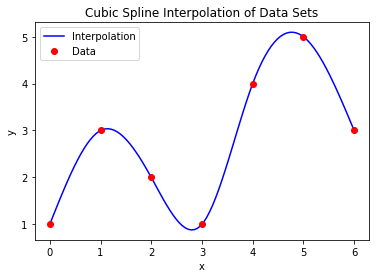

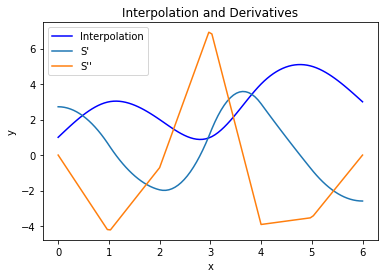

In [3]:
x = [0, 1, 2, 3, 4, 5, 6]
y = [1, 3, 2, 1, 4, 5, 3]

f = CubicSpline(x, y, bc_type='natural')
xn = np.linspace(0, 6, 100)
yn = f(xn)

#roots = CubicSpline.roots(f)
#print(roots)

plt.plot(xn, yn, 'b', label = 'Interpolation')
plt.plot(x, y, 'ro', label = 'Data')
plt.title('Cubic Spline Interpolation of Data Sets')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(xn, yn, 'b', label = 'Interpolation')
plt.title('Interpolation and Derivatives')
plt.plot(xn, f(xn, 1), label="S'")
plt.plot(xn, f(xn, 2), label="S''")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()